# Análisis de una solución de la ecuación de Dirichlet

La solución de la ecuación 
$$\frac{\partial^{2}u}{\partial x^2} + \frac{\partial^{2}u}{\partial y^2} = 0$$
sujeta a las condiciones de frontera:
$$u(0,y) = u(1,y) = 0, \;\;\; 0<y<1$$
Y la condición inicial:
$$u(x,0) = 100,\ u(x,1) = 200,\;\;\;0<x<1$$
Esta dada en términos de la serie de Fourier por la expresión:
$$ u(x,y) = \sum^{\infty}_{n=1} \frac{200 \left( (-1)^{n+1} + 1 \right)}{n \pi} \left[ cosh(n \pi y) + \frac{2 - cosh(n \pi)}{senh(n \pi)} senh(n \pi y) \right] sen(n \pi x) $$

In [1]:
from pylab import *
from matplotlib import animation,rc # biblioteca de animacion
from IPython.display import HTML # biblioteca para generar el video
%config InlineBackend.figure_format = 'retina'

Para empezar, graficamos la condición inicial.

In [2]:
def recta(x):
    y = zeros(len(x))
    for i in range(len(x)):
        if (x[i] >= 0) and (x[i] <= 1):
          y[i] = 100
    return y

In [3]:
def recta_1(x):
    y = zeros(len(x))
    for i in range(len(x)):
        if (x[i] >= 0) and (x[i] <= 1):
          y[i] = 200
    return y

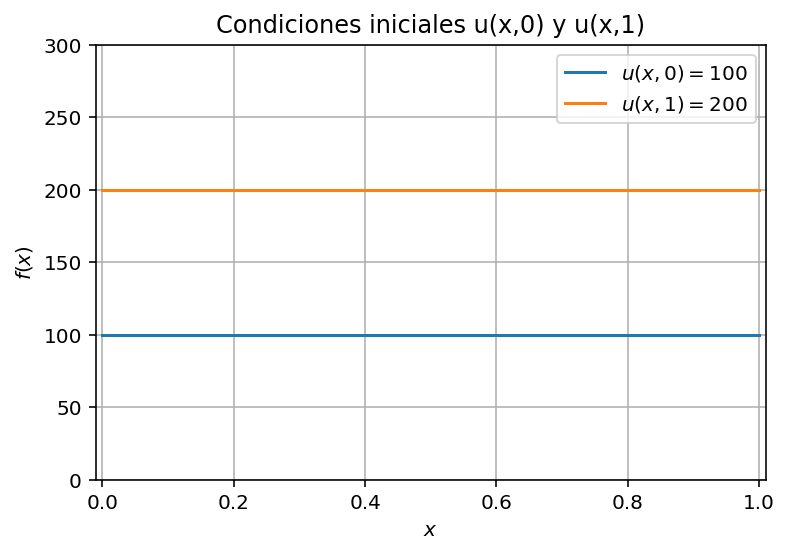

In [4]:
x = linspace(0,1,1000)
f = recta(x)
f_1 = recta_1(x)
plot(x,f,label='$u(x,0)=100$')
plot(x,f_1,label='$u(x,1)=200$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Condiciones iniciales u(x,0) y u(x,1)")
xlim([-0.01,1.01]),ylim([-0.01,300]),grid(),legend()
show()

Usamos una serie de Fourier para aproximar la condición inicial 
$$u(x,0) = 100,\;\;\;0<x<1$$

Y para aproximar la condición inicial 
$$u(x,1) = 200,\;\;\;0<x<1$$

In [5]:
def u_0(x,N=20): # N es el número de armónicos
    f = zeros(len(x))
    for n in range(1,N):
        f += 200.0*(1.0-cos(n*pi))*sin(n*pi*x)/(n*pi)
    return (f)

In [6]:
def u_1(x,N=20): # N es el número de armónicos
    f_1 = zeros(len(x))
    for n in range(1,N):
        f_1 += 400.0*(1.0-cos(n*pi))*sin(n*pi*x)/(n*pi)
    return (f_1)

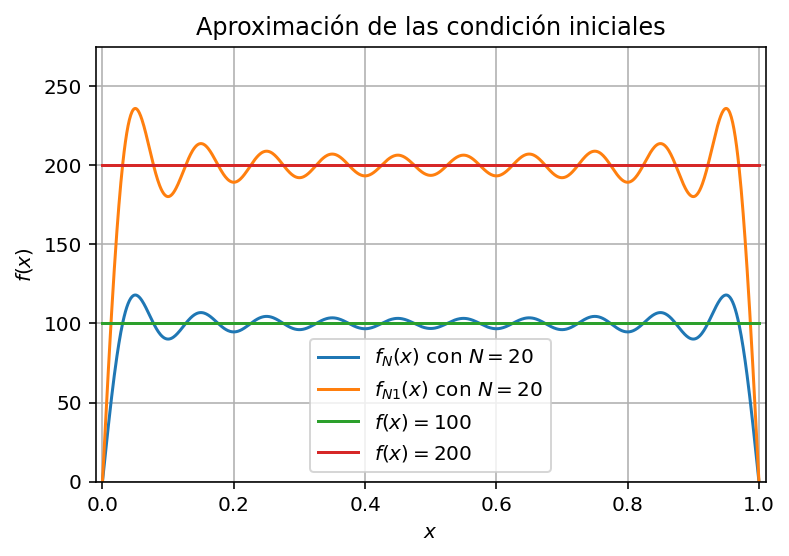

In [7]:
f_n = u_0(x)
f_n1 = u_1(x)
plot(x,f_n,label='$f_N(x)$ con $N=20$')
plot(x,f_n1,label='$f_{N1}(x)$ con $N=20$')
plot(x,f,label='$f(x)=100$')
plot(x,f_1,label='$f(x)=200$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Aproximación de las condición iniciales")
xlim([-0.01,1.01]),ylim([-0.01,275]),grid(),legend()
show()

Podemos visualizar la aproximación para diferentes cantidades de armónicos.

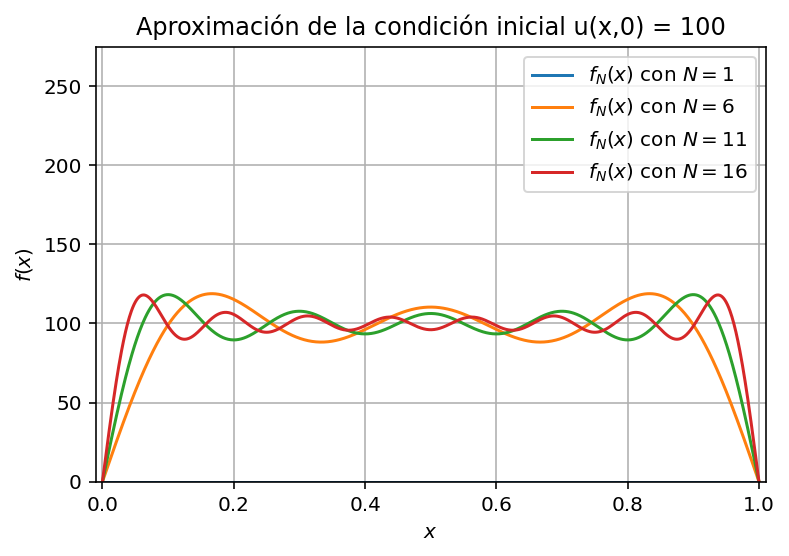

In [8]:
for i in range(1,20,5):
    plot(x,u_0(x,i),label='$f_N(x)$ con $N=%d$' %i)
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Aproximación de la condición inicial u(x,0) = 100")
xlim([-0.01,1.01]),ylim([-0.01,275]),grid(),legend()
show()

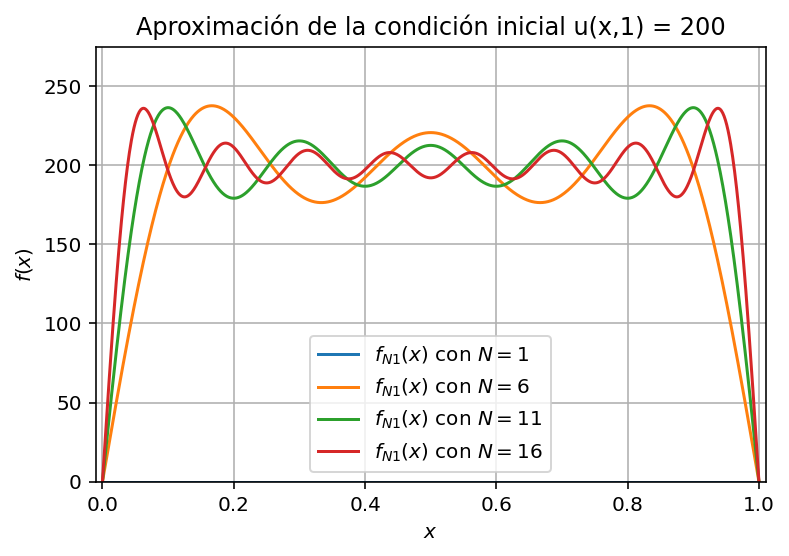

In [9]:
for i in range(1,20,5):
    plot(x,u_1(x,i),label='$f_{N1}(x)$ con $N=%d$' %i)
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Aproximación de la condición inicial u(x,1) = 200")
xlim([-0.01,1.01]),ylim([-0.01,275]),grid(),legend()
show()

Ahora, agregamos la parte de y para visualizar la solución completa. Primero, para el momento inicial, $y=0$.

In [10]:
def u_x_y(x,t,N=50):
    f = zeros( (len(x),len(y)) )
    for i in range(len(y)):
        for n in range(1,N):
            f[:,i] += 200.0*(1.0-cos(n*pi))*(cosh(n*pi*y[i]) + ((2.0 - cosh(n*pi))/sinh(n*pi))*sinh(n*pi*y[i]))*sin(n*pi*x)/(n*pi)
    return (f)

In [11]:
x = linspace(0,1,1000)
y = linspace(0,10,1000)
U = u_x_y(x,y)

<ipython-input-10-4f97a451b9f5>:5: RuntimeWarning: overflow encountered in cosh
  f[:,i] += 200.0*(1.0-cos(n*pi))*(cosh(n*pi*y[i]) + ((2.0 - cosh(n*pi))/sinh(n*pi))*sinh(n*pi*y[i]))*sin(n*pi*x)/(n*pi)
<ipython-input-10-4f97a451b9f5>:5: RuntimeWarning: overflow encountered in sinh
  f[:,i] += 200.0*(1.0-cos(n*pi))*(cosh(n*pi*y[i]) + ((2.0 - cosh(n*pi))/sinh(n*pi))*sinh(n*pi*y[i]))*sin(n*pi*x)/(n*pi)
<ipython-input-10-4f97a451b9f5>:5: RuntimeWarning: invalid value encountered in double_scalars
  f[:,i] += 200.0*(1.0-cos(n*pi))*(cosh(n*pi*y[i]) + ((2.0 - cosh(n*pi))/sinh(n*pi))*sinh(n*pi*y[i]))*sin(n*pi*x)/(n*pi)


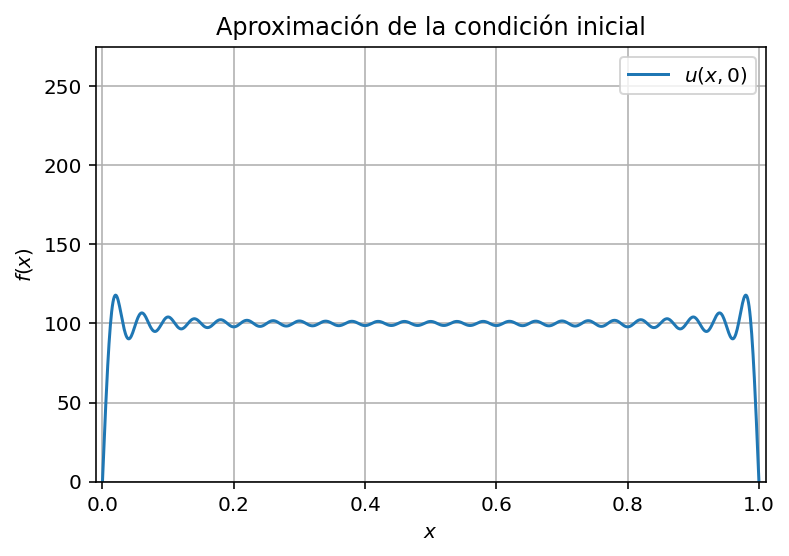

In [12]:
plot(x,U[:,0],label='$u(x,0)$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Aproximación de la condición inicial")
xlim([-0.01,1.01]),ylim([-0.01,275]),grid(),legend()
show()

Luego, para diferentes valores de y, lo cual nos permite ver cómo la solución evoluciona cuando $y \to 1$.

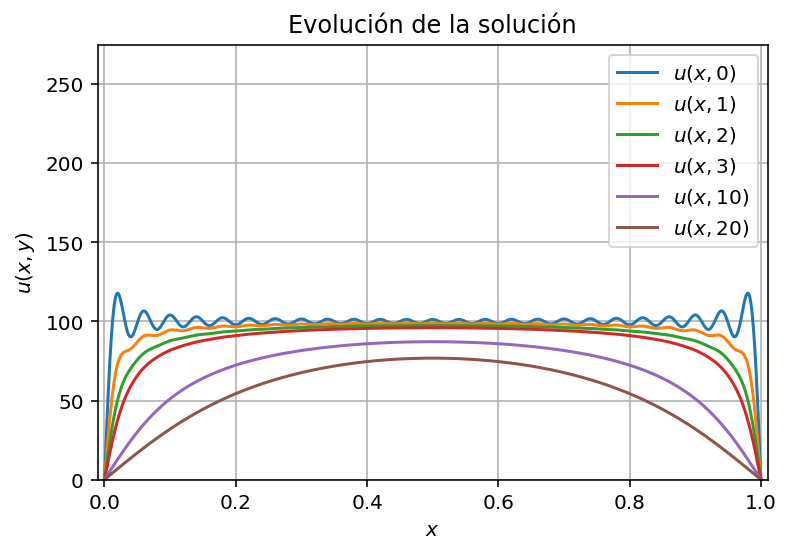

In [13]:
plot(x,U[:,0],label='$u(x,0)$') # Mejorar
plot(x,U[:,1],label='$u(x,1)$')
plot(x,U[:,2],label='$u(x,2)$')
plot(x,U[:,3],label='$u(x,3)$')
plot(x,U[:,10],label='$u(x,10)$')
plot(x,U[:,20],label='$u(x,20)$')
plt.xlabel('$x$'); plt.ylabel('$u(x,y)$'); 
plt.title("Evolución de la solución")
xlim([-0.01,1.01]),ylim([-0.01,275]),grid(),legend()
show()

Y podemos ver esto en una gráfica en 3D.

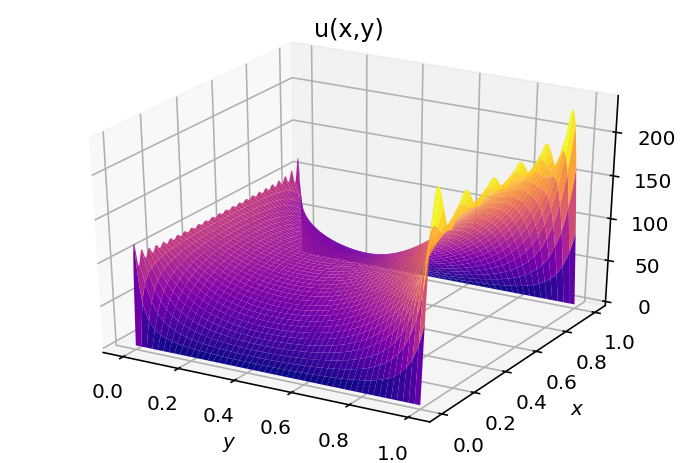

In [14]:
#%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
n=30

x = linspace(0,1.0,1000)
y = linspace(0,1.0,1000)

X,Y = np.meshgrid(x,y)
U = 200.0*(1.0-cos(n*pi))*(cosh(n*pi*y) + ((2.0 - cosh(n*pi))/sinh(n*pi))*sinh(n*pi*y))*sin(n*pi*x)/(n*pi)

U = u_x_y(x,y)

plt.xlabel('$y$'); plt.ylabel('$x$'); 
plt.title("u(x,y)")
ax.plot_surface(X, Y, U, cmap="plasma"); #Otros colores:"viridis", "inferno", "plasma"